In [1]:
#importing libraries 

import pandas as pd
import numpy as np
from nltk import tokenize
from operator import itemgetter
import math
from difflib import SequenceMatcher

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import CountVectorizer

from textblob import Word
from spellchecker import SpellChecker
import re

from sentence_transformers import SentenceTransformer

stop_words =set(stopwords.words('english'))
data=pd.read_csv("FAQ_handbook.csv")  # reading masterfile

/Users/kenny/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kenny/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = data.copy()
df

,Question,answer
0,What is the M.S. in Data Science (MSDS) progr...,The MSDS program is a two-year residential pro...
1,What disciplines are covered in the MSDS prog...,"The program covers computer science, informati..."
2,How many credit hours are required for the MS...,Students are required to complete 30 credit ho...
3,Can you explain the distinct tracks offered i...,The program offers distinct tracks: Applied Da...
4,Is the MSDS program suitable for those intere...,"Yes, the program prepares students for both da..."
...,...,...
198,How does the MLS program address e...,The program introduces students to key policy ...
199,What role does research play in th...,The program emphasizes effective research desi...
200,How do MLS graduates approach prof...,Graduates approach professional issues with a ...
201,What kind of managerial skills do ...,"Students learn basic managerial functions, inc..."


In [3]:
# unique = data['Question'].unique()
# data =pd.DataFrame(unique,columns=['Question'])
# data

In [4]:
data

,Question,answer
0,What is the M.S. in Data Science (MSDS) progr...,The MSDS program is a two-year residential pro...
1,What disciplines are covered in the MSDS prog...,"The program covers computer science, informati..."
2,How many credit hours are required for the MS...,Students are required to complete 30 credit ho...
3,Can you explain the distinct tracks offered i...,The program offers distinct tracks: Applied Da...
4,Is the MSDS program suitable for those intere...,"Yes, the program prepares students for both da..."
...,...,...
198,How does the MLS program address e...,The program introduces students to key policy ...
199,What role does research play in th...,The program emphasizes effective research desi...
200,How do MLS graduates approach prof...,Graduates approach professional issues with a ...
201,What kind of managerial skills do ...,"Students learn basic managerial functions, inc..."


In [5]:
keywords =[]
def Get_Output_list(data):  # Get output function gives out the first similar check results
        def get_top_n(dict_elem, n):  #function used in TF-IDF
            result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
            return result

        def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
            synonyms = []
            for syn in wordnet.synsets(a):
                for lm in syn.lemmas():
                     synonyms.append(lm.name())
            return (list(set(synonyms)))

        def check_sent(word, sentences):  #function used in TF-IDF
            final = [all([w in x for w in word]) for x in sentences] 
            sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
            return int(len(sent_len))

        from difflib import SequenceMatcher 
        def similar(a, b):  # this function is used to calculate similar score using sequence matcher
            output=SequenceMatcher(None, a, b).ratio()
            return output        
        for question in data['Question']:
            total_sentences = tokenize.sent_tokenize(question)
            total_sent_len = len(total_sentences)
            total_words =question.split()
            total_word_length = len(total_words)
            tf_score ={}
            for each_word in total_words:
                each_word = each_word.replace('.','')
                if each_word not in stop_words:
                    if each_word in tf_score:
                        tf_score[each_word]+=1
                    else:
                        tf_score[each_word] =1

            tf_score.update((x,y/int(total_word_length)) for x,y in tf_score.items())
            idf_score = {}
            for each_word in total_words:
                each_word = each_word.replace('.','')
                if each_word not in stop_words:
                    if each_word in idf_score:
                        idf_score[each_word] = check_sent(each_word, total_sentences)
                    else:
                        idf_score[each_word] = 1

            idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
            tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
            check = list(get_top_n(tf_idf_score, 5).keys())
            keywords.append(check)
        data['keywords'] = keywords
        return data

In [6]:
Get_Output_list(data)

,Question,answer,keywords
0,What is the M.S. in Data Science (MSDS) progr...,The MSDS program is a two-year residential pro...,"[What, MS, Data, Science, (MSDS)]"
1,What disciplines are covered in the MSDS prog...,"The program covers computer science, informati...","[What, disciplines, covered, MSDS, program?]"
2,How many credit hours are required for the MS...,Students are required to complete 30 credit ho...,"[How, many, credit, hours, required]"
3,Can you explain the distinct tracks offered i...,The program offers distinct tracks: Applied Da...,"[Can, explain, distinct, tracks, offered]"
4,Is the MSDS program suitable for those intere...,"Yes, the program prepares students for both da...","[Is, MSDS, program, suitable, interested]"
...,...,...,...
198,How does the MLS program address e...,The program introduces students to key policy ...,"[How, MLS, program, address, emerging]"
199,What role does research play in th...,The program emphasizes effective research desi...,"[What, role, research, play, MLS]"
200,How do MLS graduates approach prof...,Graduates approach professional issues with a ...,"[How, MLS, graduates, approach, professional]"
201,What kind of managerial skills do ...,"Students learn basic managerial functions, inc...","[What, kind, managerial, skills, students]"


In [7]:
def second_simiar(old_list,user_input,similar_score):  #This function is used to filterout the final responses by calculating similar score with the user input to the results. 
    final_answer = {}
    for i in range(len(old_list)): #old_list contains the results from first sinmilarilty checker
        score = similar(user_input, old_list[i])
        if score > similar_score:
            if old_list[i] not in final_answer:
                final_answer[old_list[i]] = score
    
    sorted_Diction = sorted(final_answer.items(), key=lambda x:x[1],reverse=True) 
    
    #print(user_input)
    if (len(final_answer) >= 3):
        return (list(dict(sorted_Diction).keys())[:3])
    elif (len(final_answer) == 0):
        return ("No result found")
    else:
        return (list(dict(sorted_Diction).keys())[:len(final_answer)-1])
            

In [8]:
def check_sentence_spelling_3(sentence):  # this function is used for spell checker and append the correct spelled words to res
    
    spell = SpellChecker()    
    res =""
    avoid = ['msds','MSDS','HCI/d','hci/d']
    
    words = sentence.split()
    
    words = [word.lower() for word in words]
    
    words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

    for word in words:
        word = Word(word)
        if word not in avoid:
            misspelled = spell.unknown([word])
            for word in misspelled:
                result = spell.correction(word)
                if word != result:
                    word = result
            res += word + " "
        else:
            res += word + " "
    return (res)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


def Bert_Model(doc):
    n_gram_range = (1, 3)
    stop_words = "english"

# Extract candidate words/phrases
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
    candidates = count.get_feature_names_out()
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    doc_embedding = model.encode([doc])
    candidate_embeddings = model.encode(candidates)
    top_n = 10
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
    return keywords

In [10]:
Bert = [0]*len(data)
data['Bert_keywords'] = Bert

In [11]:
data

,Question,answer,keywords,Bert_keywords
0,What is the M.S. in Data Science (MSDS) progr...,The MSDS program is a two-year residential pro...,"[What, MS, Data, Science, (MSDS)]",0
1,What disciplines are covered in the MSDS prog...,"The program covers computer science, informati...","[What, disciplines, covered, MSDS, program?]",0
2,How many credit hours are required for the MS...,Students are required to complete 30 credit ho...,"[How, many, credit, hours, required]",0
3,Can you explain the distinct tracks offered i...,The program offers distinct tracks: Applied Da...,"[Can, explain, distinct, tracks, offered]",0
4,Is the MSDS program suitable for those intere...,"Yes, the program prepares students for both da...","[Is, MSDS, program, suitable, interested]",0
...,...,...,...,...
198,How does the MLS program address e...,The program introduces students to key policy ...,"[How, MLS, program, address, emerging]",0
199,What role does research play in th...,The program emphasizes effective research desi...,"[What, role, research, play, MLS]",0
200,How do MLS graduates approach prof...,Graduates approach professional issues with a ...,"[How, MLS, graduates, approach, professional]",0
201,What kind of managerial skills do ...,"Students learn basic managerial functions, inc...","[What, kind, managerial, skills, students]",0


In [12]:
def Bert_input_preprocess(new_output):
    final = []
    diction = {}
    indexx = 0
    bert_keys = []

    def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
        synonyms = []
        for syn in wordnet.synsets(a):
            for lm in syn.lemmas():
                 synonyms.append(lm.name())
        return (list(set(synonyms)))

    def similar(a, b):  # this function is used to calculate similar score using sequence matcher
        output=SequenceMatcher(None, a, b).ratio()
        return output 

    def check_sentence_spelling_3(sentence):  # this function is used for spell checker and append the correct spelled words to res
    
        spell = SpellChecker()    
        res =""
        avoid = ['msds','MSDS','HCI/d','hci/d']
        
        words = sentence.split()
        
        words = [word.lower() for word in words]
        
        words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

        for word in words:
            word = Word(word)
            if word not in avoid:
                misspelled = spell.unknown([word])
                for word in misspelled:
                    result = spell.correction(word)
                    if word != result:
                        word = result
                if word != None:
                    res += word + " "
            else:
                if word != None:
                    res += word + " "
        return (res)
    count = 0
    for question in data['Question']:
        count += 1
        print(question)
        try:
            check = Bert_Model(check_sentence_spelling_3(question))
            data['Bert_keywords'][count-1] = check
            bert_keys.append(check)
            print(count)
        
        except ValueError:
            pass
    return bert_keys


In [13]:
Bert_keys = Bert_input_preprocess("how do i apply for leaves")

 What is the M.S. in Data Science (MSDS) program duration?


/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_28963/3307811718.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bert_keywords'][count-1] = check
/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_28963/3307811718.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['msds', 'data', 'program', 'science msds', 'msds program', 'science msds program', 'data science', 'program duration', 'data science msds', 'msds program duration']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['Bert_keywords'][count-1] = check


1
 What disciplines are covered in the MSDS program?
2
 How many credit hours are required for the MSDS degree?
3
 Can you explain the distinct tracks offered in the MSDS program?
4
 Is the MSDS program suitable for those interested in pursuing a Ph.D. as well?
5
What is the focus of the Applied Data Science track?
6
How are core coursework and specializations structured in this Applied Data Science track?
7
Can you provide examples of Data Science domains for specialization?
8
What are the options for the capstone project in the Applied Data Science track?
9
Are there prerequisites for specific courses within this Applied Data Science track?
10
What does the Big Data Systems track emphasize?
11
What are the prerequisites for students entering the Big Data Systems track?
12
Can you elaborate on the core coursework in this Big Data System track?
13
Are there any specific programming languages recommended for this Big Data Systems track?
14
What is the Computational and Analytical track 

In [14]:
print(Bert_keys)

[['msds', 'data', 'program', 'science msds', 'msds program', 'science msds program', 'data science', 'program duration', 'data science msds', 'msds program duration'], ['covered', 'disciplines', 'program', 'disciplines covered', 'msds', 'covered msds', 'covered msds program', 'msds program', 'disciplines covered msds'], ['msds', 'degree', 'hours', 'msds degree', 'required msds', 'hours required', 'credit hours', 'required msds degree', 'hours required msds', 'credit hours required'], ['explain distinct', 'distinct tracks', 'msds', 'tracks offered', 'explain distinct tracks', 'distinct tracks offered', 'msds program', 'offered msds', 'offered msds program', 'tracks offered msds'], ['msds', 'suitable interested', 'pursuing pod', 'interested pursuing', 'suitable interested pursuing', 'msds program', 'program suitable', 'program suitable interested', 'msds program suitable', 'interested pursuing pod'], ['focus', 'focus applied', 'science', 'data', 'science track', 'focus applied data', 'ap

In [15]:
data

,Question,answer,keywords,Bert_keywords
0,What is the M.S. in Data Science (MSDS) progr...,The MSDS program is a two-year residential pro...,"[What, MS, Data, Science, (MSDS)]","[msds, data, program, science msds, msds progr..."
1,What disciplines are covered in the MSDS prog...,"The program covers computer science, informati...","[What, disciplines, covered, MSDS, program?]","[covered, disciplines, program, disciplines co..."
2,How many credit hours are required for the MS...,Students are required to complete 30 credit ho...,"[How, many, credit, hours, required]","[msds, degree, hours, msds degree, required ms..."
3,Can you explain the distinct tracks offered i...,The program offers distinct tracks: Applied Da...,"[Can, explain, distinct, tracks, offered]","[explain distinct, distinct tracks, msds, trac..."
4,Is the MSDS program suitable for those intere...,"Yes, the program prepares students for both da...","[Is, MSDS, program, suitable, interested]","[msds, suitable interested, pursuing pod, inte..."
...,...,...,...,...
198,How does the MLS program address e...,The program introduces students to key policy ...,"[How, MLS, program, address, emerging]","[ensuring graduates, graduates evolving, libra..."
199,What role does research play in th...,The program emphasizes effective research desi...,"[What, role, research, play, MLS]","[does research play, role does research, stude..."
200,How do MLS graduates approach prof...,Graduates approach professional issues with a ...,"[How, MLS, graduates, approach, professional]","[related information creation, graduates, appr..."
201,What kind of managerial skills do ...,"Students learn basic managerial functions, inc...","[What, kind, managerial, skills, students]","[skills students, roles libraries information,..."


In [16]:
data.to_csv('Bert-TF-Keywords-Handbook.csv', index=False) 

In [17]:
Handbook = pd.read_csv('Bert-TF-Keywords-Handbook.csv')
Handbook

,Question,answer,keywords,Bert_keywords
0,What is the M.S. in Data Science (MSDS) progr...,The MSDS program is a two-year residential pro...,"['What', 'MS', 'Data', 'Science', '(MSDS)']","['msds', 'data', 'program', 'science msds', 'm..."
1,What disciplines are covered in the MSDS prog...,"The program covers computer science, informati...","['What', 'disciplines', 'covered', 'MSDS', 'pr...","['covered', 'disciplines', 'program', 'discipl..."
2,How many credit hours are required for the MS...,Students are required to complete 30 credit ho...,"['How', 'many', 'credit', 'hours', 'required']","['msds', 'degree', 'hours', 'msds degree', 're..."
3,Can you explain the distinct tracks offered i...,The program offers distinct tracks: Applied Da...,"['Can', 'explain', 'distinct', 'tracks', 'offe...","['explain distinct', 'distinct tracks', 'msds'..."
4,Is the MSDS program suitable for those intere...,"Yes, the program prepares students for both da...","['Is', 'MSDS', 'program', 'suitable', 'interes...","['msds', 'suitable interested', 'pursuing pod'..."
...,...,...,...,...
198,How does the MLS program address e...,The program introduces students to key policy ...,"['How', 'MLS', 'program', 'address', 'emerging']","['ensuring graduates', 'graduates evolving', '..."
199,What role does research play in th...,The program emphasizes effective research desi...,"['What', 'role', 'research', 'play', 'MLS']","['does research play', 'role does research', '..."
200,How do MLS graduates approach prof...,Graduates approach professional issues with a ...,"['How', 'MLS', 'graduates', 'approach', 'profe...","['related information creation', 'graduates', ..."
201,What kind of managerial skills do ...,"Students learn basic managerial functions, inc...","['What', 'kind', 'managerial', 'skills', 'stud...","['skills students', 'roles libraries informati..."


In [18]:
Handbook['Bert_keywords'][0]

"['msds', 'data', 'program', 'science msds', 'msds program', 'science msds program', 'data science', 'program duration', 'data science msds', 'msds program duration']"

In [19]:
words = Handbook['keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
Handbook['keywords'] = Handbook['keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
words_bert = Handbook['Bert_keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
Handbook['Bert_keywords'] = Handbook['Bert_keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
TF_all_keys = [value for sublist in words for value in sublist]
bert_all_keys= [value for sublist in words_bert for value in sublist]

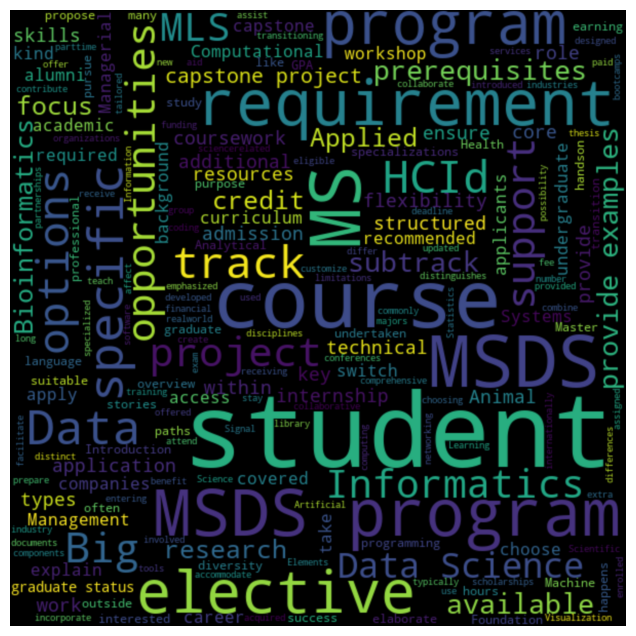

In [20]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#print(total_words_list)
cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in TF_all_keys]
#print(cleaned_words)
words = ' '.join(cleaned_words)
wordcloud = WordCloud(height=600,width=600,max_font_size=100, stopwords=stop_words).generate(words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

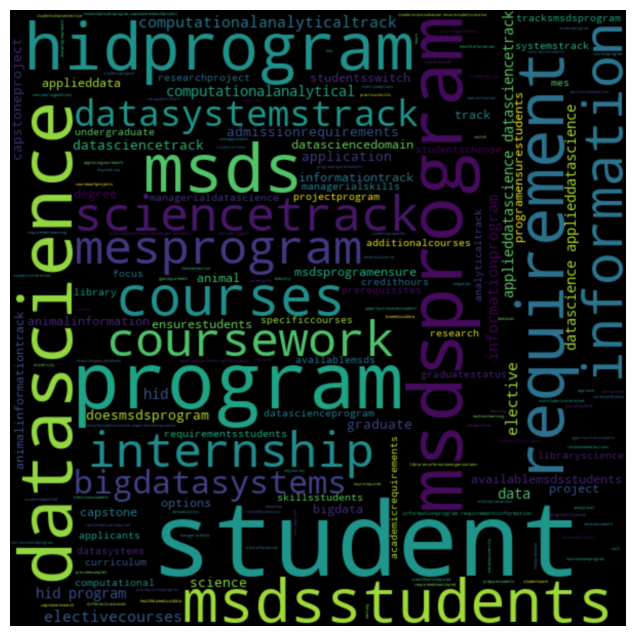

In [21]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#print(total_words_list)
cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in bert_all_keys]
#print(cleaned_words)
words = ' '.join(cleaned_words)
wordcloud = WordCloud(height=600,width=600,max_font_size=100, stopwords=stop_words).generate(words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

In [22]:
def Did_you_mean_new(user_input):
    def get_top_n(dict_elem, n):  #function used in TF-IDF
        result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
        return result

    def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
        synonyms = []
        for syn in wordnet.synsets(a):
            for lm in syn.lemmas():
                 synonyms.append(lm.name())
        return (list(set(synonyms)))

    def check_sent(word, sentences):  #function used in TF-IDF
        final = [all([w in x for w in word]) for x in sentences] 
        sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
        return int(len(sent_len))

     
    def similar(a, b):  # this function is used to calculate similar score using sequence matcher
        output=SequenceMatcher(None, a, b).ratio()
        return output 
    
    def second_simiar(old_list,user_input,similar_score):  #This function is used to filterout the final responses by calculating similar score with the user input to the results. 
        final_answer = {}
        for i in range(len(old_list)): #old_list contains the results from first sinmilarilty checker
            score = similar(user_input, old_list[i])
            if score > similar_score:
                if old_list[i] not in final_answer:
                    final_answer[old_list[i]] = score

        sorted_Diction = sorted(final_answer.items(), key=lambda x:x[1],reverse=True) 

        #print(user_input)
        if (len(final_answer) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(final_answer) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(final_answer)-1])

    def Input_pre_process(user_input):  # This finction has spell checker, TF IDF vectoriser and returns the key words
        new_sentence = check_sentence_spelling_2(user_input)

        total_sentences = tokenize.sent_tokenize(new_sentence)
        total_sent_len = len(total_sentences)

        total_words =new_sentence.split()
        total_word_length = len(total_words)

        tf_score ={}
        for each_word in total_words:
            each_word = each_word.replace('.','')
            if each_word not in stop_words:
                if each_word in tf_score:
                    tf_score[each_word]+=1
                else:
                    tf_score[each_word] =1

        tf_score.update((x,y/int(total_word_length)) for x,y in tf_score.items())

        idf_score = {}
        for each_word in total_words:
            each_word = each_word.replace('.','')
            if each_word not in stop_words:
                if each_word in idf_score:
                    idf_score[each_word] = check_sent(each_word, total_sentences)
                else:
                    idf_score[each_word] = 1

    # Performing a log and divide
        idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

        tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

        new_output = []
        new_output.append(list(get_top_n(tf_idf_score, 5).keys()))

        return (new_output)
    
    def check_sentence_spelling_2(sentence):  # this function is used for spell checker and append the correct spelled words to res
        
        spell = SpellChecker()    
        res =""
        avoid = ['msds','MSDS','HCI/d','hci/d']
        
        words = sentence.split()
        
        words = [word.lower() for word in words]
        
        words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

        for word in words:
            word = Word(word)
            if word not in avoid:
                misspelled = spell.unknown([word])
                for word in misspelled:
                    result = spell.correction(word)
                    if word != result:
                        word = result
                res += word + " "
            else:
                res += word + " "
        return (res)
    
    def Get_Output_new(new_output):  # Get output function gives out the first similar check results
        final = []
        diction = {}
        count = 0
        
        for check in Handbook['keywords']:
            for i in range(len(new_output[0])):
                swap = new_output[0].copy()
                for j in range(len(check)):
                    if len(set(synextract(new_output[0][i])) & set(synextract(check[j]))) > 0:
                        #print(new_output[0][i],check[j])
                        new_output[0][i] = check[j]
                        score = similar(new_output[0],check)
                        score = score - 0.05    # subtracting 0.05 just to keep the synonyms below the main keyword.
                        new_output[0][i] = swap[i]
                        if score >= 0.005:
                            if Handbook['Question'][count] not in final:
                                final.append(Handbook['Question'][count])
                                diction[Handbook['Question'][count]] = score
            count += 1
        
        sorted_Diction = sorted(diction.items(), key=lambda x:x[1],reverse=True)
        old_list = (list(dict(sorted_Diction).keys()))
        #print(old_list)
        #return old_list
        if (len(old_list) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(old_list) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(old_list)-1])
        
    return Get_Output_new(Input_pre_process(user_input))

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


def Bert_Model(doc):
    n_gram_range = (1, 3)
    stop_words = "english"

# Extract candidate words/phrases
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
    candidates = count.get_feature_names_out()
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    doc_embedding = model.encode([doc])
    candidate_embeddings = model.encode(candidates)
    top_n = 25
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
    return keywords

def Did_you_mean_new_bert(user_input):

    def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
        synonyms = []
        for syn in wordnet.synsets(a):
            for lm in syn.lemmas():
                 synonyms.append(lm.name())
        return (list(set(synonyms)))

    def check_sent(word, sentences):  #function used in TF-IDF
        final = [all([w in x for w in word]) for x in sentences] 
        sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
        return int(len(sent_len))

     
    def similar(a, b):  # this function is used to calculate similar score using sequence matcher
        output=SequenceMatcher(None, a, b).ratio()
        return output 
    
    def second_simiar(old_list,user_input,similar_score):  #This function is used to filterout the final responses by calculating similar score with the user input to the results. 
        final_answer = {}
        for i in range(len(old_list)): #old_list contains the results from first sinmilarilty checker
            score = similar(user_input, old_list[i])
            if score > similar_score:
                if old_list[i] not in final_answer:
                    final_answer[old_list[i]] = score

        sorted_Diction = sorted(final_answer.items(), key=lambda x:x[1],reverse=True) 

        #print(user_input)
        if (len(final_answer) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(final_answer) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(final_answer)-1])

    def Input_pre_process(user_input):  # This finction has spell checker, TF IDF vectoriser and returns the key words

        new_sentence = check_sentence_spelling_2(user_input)
        
        check = list(Bert_Model(new_sentence))
        
        new_output = []
        new_output.append(list(check))
        return (new_output)

    
    def check_sentence_spelling_2(sentence):  # this function is used for spell checker and append the correct spelled words to res
        
        spell = SpellChecker()    
        res =""
        avoid = ['msds','MSDS','HCI/d','hci/d']
        
        words = sentence.split()
        
        words = [word.lower() for word in words]
        
        words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

        for word in words:
            word = Word(word)
            if word not in avoid:
                misspelled = spell.unknown([word])
                for word in misspelled:
                    result = spell.correction(word)
                    if word != result:
                        word = result
                res += word + " "
            else:
                res += word + " "
        return (res)
    
    def Get_Output_new(new_output):  # Get output function gives out the first similar check results
        final = []
        diction = {}
        count = 0
        for check in Handbook['Bert_keywords']:
            check = check_sentence_spelling_2(check)
            for i in range(len(new_output[0])):
                swap = new_output[0].copy()
                for j in range(len(check)):
                    
                    if len(set(synextract(new_output[0][i])) & set(synextract(check[j]))) > 0:
                        #print(new_output[0][i],check[j])
                        new_output[0][i] = check[j]
                        score = similar(new_output[0],check)
                        score = score - 0.05    # subtracting 0.05 just to keep the synonyms below the main keyword.
                        new_output[0][i] = swap[i]
                        if score >= 0.005:
                            if Handbook['Question'][count] not in final:
                                final.append(Handbook['Question'][count])
                                diction[Handbook['Question'][count]] = score
            count += 1

        sorted_Diction = sorted(diction.items(), key=lambda x:x[1],reverse=True)
        #print(sorted_Diction)
        old_list = (list(dict(sorted_Diction).keys()))
        #print(old_list)
        #return old_list
        if (len(old_list) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(old_list) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(old_list)-1])
        
    return Get_Output_new(Input_pre_process(user_input))

In [24]:
Handbook['keywords']

0                  [What, MS, Data, Science, (MSDS)]
1       [What, disciplines, covered, MSDS, program?]
2               [How, many, credit, hours, required]
3          [Can, explain, distinct, tracks, offered]
4          [Is, MSDS, program, suitable, interested]
                           ...                      
198           [How, MLS, program, address, emerging]
199                [What, role, research, play, MLS]
200    [How, MLS, graduates, approach, professional]
201       [What, kind, managerial, skills, students]
202    [Can, provide, examples, recent, innovations]
Name: keywords, Length: 203, dtype: object

In [25]:
Handbook['keywords'][1]

['What', 'disciplines', 'covered', 'MSDS', 'program?']

In [26]:
def Chatbot_response(user_input):
    if user_input in list(Handbook['Question']):
        indx = (list(Handbook['Question']).index(user_input))
        ans = Handbook['answer'][indx]
        return ans
    else:
        out =  Did_you_mean_new(user_input)
        print("I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.\n")
        for i, question in enumerate(out, 1):
            print(f"{i}. {question}")
            #print(Chatbot_response_bert(question))

In [27]:
def Chatbot_response_bert(user_input):
    if user_input in list(Handbook['Question']):
        indx = (list(Handbook['Question']).index(user_input))
        ans = Handbook['answer'][indx]
        return ans
    else:
        bert_out = Did_you_mean_new_bert(user_input)
        print("I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.\n")
        for i, question in enumerate(bert_out, 1):
            print(f"{i}. {question}")
            #print(Chatbot_response_bert(question))


In [28]:
def check_sentence_spelling_2(sentence):  # this function is used for spell checker and append the correct spelled words to res
        
    spell = SpellChecker()    
    res =""
    avoid = ['msds','MSDS','HCI/d','hci/d']
        
    words = sentence.split()
        
    words = [word.lower() for word in words]
        
    words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

    for word in words:
        word = Word(word)
        if word not in avoid:
            misspelled = spell.unknown([word])
            for word in misspelled:
                result = spell.correction(word)
                if word != result:
                    word = result
            res += word + " "
        else:
            res += word + " "
    return (res)

In [32]:
user_input = 'what are the diferent traks in dta sciecne'
check_sentence_spelling_2(user_input)

'what are the different tracks in data science '

In [30]:
user_input = Handbook['Question'][0]
check_sentence_spelling_2(user_input)

'what is the is in data science msds program duration '

In [ ]:
user_input = 'what are the programs in data sciecne'
Chatbot_response(user_input)

I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.

1. How does the capstone project contribute to a student's portfolio?
2.  What is the M.S. in Data Science (MSDS) program duration?
3.  Is the MSDS program suitable for those interested in pursuing a Ph.D. as well?


In [ ]:
user_input = 'Where can I enrol for dta sciecne'
Chatbot_response(user_input)

I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.

1.  What is the M.S. in Data Science (MSDS) program duration?
2. What is the focus of the Applied Data Science track?
3. Can you provide examples of Data Science domains for specialization?


In [ ]:
user_input = 'What is the focus of the Applied Data Science track?'
Chatbot_response(user_input)

'This track focuses on both data science methods and their application in different domains.'

In [ ]:
user_input = ' What is the M.S. in Data Science (MSDS) program duration?'
Chatbot_response_bert(user_input)

'The MSDS program is a two-year residential program.'

In [ ]:
user_input = 'Can you provide examples of Data Science domains for specialization?'
Chatbot_response(user_input)

'Examples include Augmented and Virtual Reality, Data Security and Privacy, Economic Data Analytics, Health and Biomedical Data Science, Human Robotic Interaction, and Social Data Science.'

In [ ]:
user_input = 'Can you provide examples of industry partnerships or collaborations that have influenced the project selection for the capstone project in the Applied Data Science track?'
Chatbot_response(user_input)

['Can you provide examples of Data Science domains for specialization?',
 'Can you provide examples of courses in the Management in Theory category?',
 'Can you provide examples of companies where MSDS graduates have been hired?']

In [ ]:
user_input = 'Can you provide examples of industry partnerships or collaborations that have influenced the project selection for the capstone project in the Applied Data Science track?'
Chatbot_response_bert(user_input)


['Is there an application fee for the MSDS program?',
 'What documents are required for the application for MSDS process?',
 'How does the MSDS program incorporate real-world applications in coursework?']

In [ ]:
user_input = 'What is the duration of the MSDS program, and are there any options for accelerated completion?'
Chatbot_response_bert(user_input)

['             Are there any options for additional courses in bioinformatics and related disciplines?',
 '             What is the M.S. in Bioinformatics program?',
 '             What are the prerequisites for the M.S. in Bioinformatics program?']